### 统计学：检验心理学现象

在下方单元格中回答问题并执行相关代码，你可以 [参考项目指导](https://github.com/udacity/new-dand-advanced-china/blob/master/%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1/%E7%BB%9F%E8%AE%A1%E5%AD%A6%EF%BC%9A%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1.md) 并在正式提交前查看 [项目要求](https://review.udacity.com/#!/rubrics/305/view)。提交时请将 Jupyter notebook 导出成 HTML 或者 PDF 进行提交（File -> Download As）。

背景信息

在一个Stroop （斯特鲁普）任务中，参与者得到了一列文字，每个文字都用一种油墨颜色展示。参与者的任务是将文字的打印颜色大声说出来。这项任务有两个条件：一致文字条件，和不一致文字条件。在一致文字条件中，显示的文字是与它们的打印颜色匹配的颜色词，如“红色”、“蓝色”。在不一致文字条件中，显示的文字是与它们的打印颜色不匹配的颜色词，如“紫色”、“橙色”。在每个情况中，我们将计量说出同等大小的列表中的墨色名称的时间。每位参与者必须全部完成并记录每种条件下使用的时间。

调查问题

作为一般说明，请确保记录你在创建项目时使用或参考的任何资源。作为项目提交的一部分，你将需要报告信息来源。

(1) 我们的自变量是什么？因变量是什么？

自变量：文字的意义与颜色是否一致的条件   
因变量：参与者说出文字的打印颜色的时间

(2) 此任务的适当假设集是什么？你需要以文字和数学符号方式对假设集中的零假设和对立假设加以说明，并对数学符号进行定义。你想执行什么类型的统计检验？为你的选择提供正当理由（比如，为何该实验满足你所选统计检验的前置条件）。

假设$\mu_1$表示词义与打印颜色一致时参与者总体完成任务的平均时间   
$\mu_2$表示词义与打印颜色不一致时参与者总体完成任务的平均时间   
$\mu_d$表示参与者总体完成两种任务的时间差的平均值   
零假设和对立假设如下：    
$H_0: \mu_d=0$    
$H_1: \mu_d \neq0$     
若$H_0$被拒绝，则可以得出总体完成两种任务的平均时间是不同的。   
统计检验：   
1)两样本观测值数目相同，且两样本数据是一一对应的，所以是配对的   
2)样本数只有24，为小样本，通过ks检验得知配对样本的差值符合正态分布（详见如下测试）     
所以选择配T检验进行统计检验

In [1]:
#导入pandas
import pandas as pd 
import os
#获取当前目录
os.getcwd()

'D:\\Udacity\\Project1_Perceptual_Phenomenon_Test'

In [2]:
#读取CSV文件
df=pd.read_csv('stroopdata.csv')
#查看前5条记录
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [3]:
#查看数据信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 424.0 bytes


In [4]:
import numpy as np
from scipy.stats import kstest
df.diff=df.Congruent-df.Incongruent
kstest(df.diff,'norm',args=(df.diff.mean(), df.diff.std()))

KstestResult(statistic=0.13179116300510851, pvalue=0.79872907771193435)

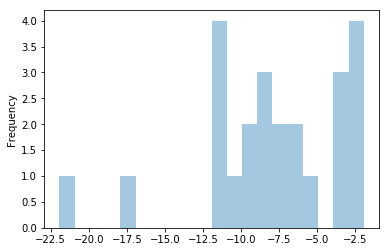

In [5]:
import matplotlib.pyplot as plt
(df.Congruent-df.Incongruent).plot.hist(alpha=0.4,bins=20)
plt.show()

ks检验p值等于0.80>=0.05，两配对样本的差值服从正态分布。

现在轮到你自行尝试 Stroop 任务了。前往此链接，其中包含一个基于 Java 的小程序，专门用于执行 Stroop 任务。记录你收到的任务时间（你无需将时间提交到网站）。现在下载此数据集，其中包含一些任务参与者的结果。数据集的每行包含一名参与者的表现，第一个数字代表他们的一致任务结果，第二个数字代表不一致任务结果。

(3) 报告关于此数据集的一些描述性统计。包含至少一个集中趋势测量和至少一个变异测量。

In [6]:
#集中趋势测量：均值
df.mean()

Congruent      14.051125
Incongruent    22.015917
dtype: float64

In [7]:
#集中趋势测量：中位数
df.median()

Congruent      14.3565
Incongruent    21.0175
dtype: float64

In [8]:
#变异测量：方差
df.var()

Congruent      12.669029
Incongruent    23.011757
dtype: float64

In [9]:
#变异测量：标准差
df.std()

Congruent      3.559358
Incongruent    4.797057
dtype: float64

In [10]:
#标准差系数：
df.std()/df.mean()

Congruent      0.253315
Incongruent    0.217890
dtype: float64

比较不一致和一致的均值，中位数，不一致情况下平均时间高于一致的情况。    
一致时标准差系数是25.33%，不一致时标准差系数是21.79%，一致时变异程度大于不一致时。

(4) 提供显示样本数据分布的一个或两个可视化。用一两句话说明你从图中观察到的结果。

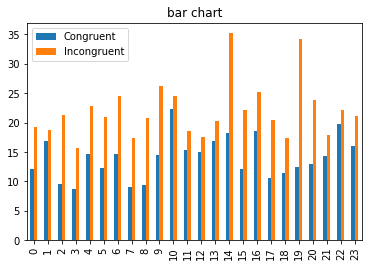

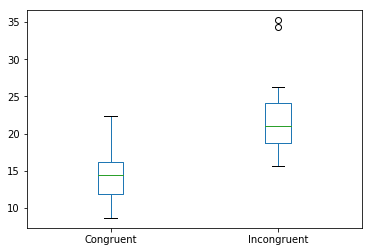

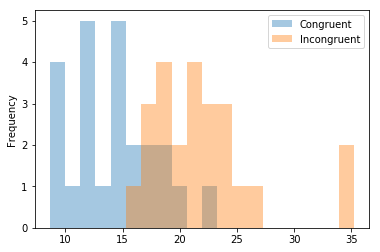

In [11]:
#import matplotlib
import matplotlib.pyplot as plt
#bar chart
df.plot.bar(title='bar chart')
#box chart
df.plot.box()
#histogram chart
df.plot.hist(alpha=0.4,bins=20)
plt.show()

每位参与者在词义和打印颜色不一致情况下说出打印颜色所花的时间比一致时所花时间长。    
不一致任务的数据集有两个异常值。

(5) 现在，执行统计测试并报告你的结果。你的置信水平和关键统计值是多少？你是否成功拒绝零假设？对试验任务得出一个结论。结果是否与你的期望一致？

In [12]:
import numpy as np
from scipy.stats import ttest_rel
ttest_rel(df.Congruent,df.Incongruent)

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)

配对T检验置信水平是95%，统计值t=-0.802，P值=0.00000004<0.05,所以拒绝零假设$H_0$。    
总体完成两种任务的平均时间是不同的，文字的干扰（文字的词义和打印颜色是否一致）对参与者说出打印时间的影响是显著的。与期望一致。


参考文献：    
Stroop effect:     
https://en.wikipedia.org/wiki/Stroop_effect     
https://m.baidu.com/sf_edu_wenku/view/ca21111f964bcf84b9d57b71.html#1     

自变量 因变量   
https://wapbaike.baidu.com/item/%E8%87%AA%E5%8F%98%E9%87%8F/6895256?fr=aladdin    
https://m.baidu.com/sf_edu_wenku/view/ca21111f964bcf84b9d57b71.html#1    

Pandas：    
https://pandas.pydata.org/pandas-docs/stable/10min.html     

Latex    
http://data-blog.udacity.com/posts/2016/10/latex-primer/    
http://blog.163.com/goldman2000@126/blog/static/167296895201223104411122/     
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ranksums.html#scipy.stats.ranksums     

Central trendrency    
https://statistics.laerd.com/statistical-guides/measures-central-tendency-mean-mode-median.php     
https://wapbaike.baidu.com/item/集中趋势/7179614?fr=aladdin     

Coefficient of Variation     
https://baike.baidu.com/item/%E5%8F%98%E5%BC%82%E7%B3%BB%E6%95%B0/6463621?fr=aladdin    
https://en.wikipedia.org/wiki/Coefficient_of_variation     
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.var.html     

Pandas visualization：     
http://pandas.pydata.org/pandas-docs/stable/visualization.html    

KS test    
https://stackoverflow.com/questions/19009530/how-to-use-scipy-stats-kstest-basic-questions-about-kolmogorov-smirnov-test

T test on two related samples    
https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_rel.html  